In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
clean = pd.read_csv('~/Google/19Spring/ANLY501ASL/GroupProject/cleaned_merged_data5.csv')
clean.head()

,alias,permit_cap_status,Project_Status,ReviewCycle,TaskName,GroupName,elapsed_workdays,RC_ReviewStatus,RC_HowAssigned,job_class,...,Energy Review,Fire Review,Green Review,Mechanical Review,Plumbing Review,Structural Review,Zoning Review,use_change,num_units_change,gfa_change
0,Alteration and Repair Permit,Permit Issued,Approved,1.0,DepartmentReview,DOEE,7.0,Assign Only,FirstInGroup,E,...,0,0,0,0,0,0,0,True,True,False
1,Alteration and Repair Permit,Permit Issued,Approved,1.0,DepartmentReview,Electrical Review,3.0,Assign Only,FirstInGroup,E,...,0,0,0,0,0,0,0,True,True,False
2,Alteration and Repair Permit,Permit Issued,Approved,1.0,DepartmentReview,Energy Review,2.0,Assign Only,FirstInGroup,E,...,1,0,0,0,0,0,0,True,True,False
3,Alteration and Repair Permit,Permit Issued,Approved,3.0,DepartmentReview,Energy Review,19.0,Approved,Individual,E,...,1,0,0,0,0,0,0,True,True,False
4,Alteration and Repair Permit,Permit Issued,Approved,3.0,DepartmentReview,Electrical Review,6.0,Approved,Individual,E,...,0,0,0,0,0,0,0,True,True,False


In [3]:
dcra = pd.read_csv('~/Google/19Spring/ANLY501ASL/GroupProject/permit_reviews_an.csv')
dcra.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (37,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,As_Of_Date,alias,permit_cap_status,pdox_b1_id,Project_Status,Project_Description,Project_CreateDate,ReviewCycle,TaskName,TaskStatus,...,existing_number_units,present_gfa,create_review,ssl,perm_id,RC_assignedBy_anon,UpdatedByEmail_anon,applicant_anon,owner_name_anon,NAME_anon
0,35:12.1,Addition Alteration Repair Permit,Review In Process,B1502871,Approved,Addition Alteration Repair Permit - 1110 6TH S...,00:00.0,1.0,ReviewQA,Complete,...,1.0,0.0,1346,0449 0049,6000001,NaN,EMID 2,PP 6034,PP 1,PP 4610
1,35:12.1,Addition Alteration Repair Permit,Review In Process,B1502871,Approved,Addition Alteration Repair Permit - 1110 6TH S...,00:00.0,0.0,ApplicantUpload,Complete,...,1.0,0.0,1346,0449 0049,6000002,NaN,EMID 2,PP 6034,PP 1,PP 4610
2,35:12.1,Addition Alteration Repair Permit,Review In Process,B1502871,Approved,Addition Alteration Repair Permit - 1110 6TH S...,00:00.0,0.0,PreScreenReview,Complete,...,1.0,0.0,1346,0449 0049,6000003,NaN,EMID 2,PP 6034,PP 1,PP 4610
3,35:12.1,Addition Alteration Repair Permit,Review In Process,B1502871,Approved,Addition Alteration Repair Permit - 1110 6TH S...,00:00.0,0.0,BeginReview,Complete,...,1.0,0.0,1346,0449 0049,6000004,NaN,EMID 2,PP 6034,PP 1,PP 4610
4,35:12.1,Addition Alteration Repair Permit,Review In Process,B1502871,Approved,Addition Alteration Repair Permit - 1110 6TH S...,00:00.0,1.0,DepartmentReview,Complete,...,1.0,0.0,1346,0449 0049,6000005,EMID 2,EMID 3,PP 6034,PP 1,PP 4611


In [38]:
dcra['elapsed_workdays_30'] = dcra['elapsed_workdays'].apply(lambda x: 1 if x > 30 else 0)
dcra['DCRA'] = dcra['AGENCY'].apply(lambda x: 1 if x == 'DCRA' else 0)
dcra['Commercial'] = dcra['use_type'].apply(lambda x: 1 if x == 'C' else 0)

In [39]:
dcra = dcra.dropna()

In [41]:
dcra[['elapsed_workdays','elapsed_workdays_30','DCRA','Commercial','ReviewCycle','Ward']].mean()

elapsed_workdays       7.701923
elapsed_workdays_30    0.018370
DCRA                   0.778703
Commercial             0.563002
ReviewCycle            2.444173
Ward                   3.707664
dtype: float64

In [42]:
dcra[['elapsed_workdays','elapsed_workdays_30','DCRA','Commercial','ReviewCycle','Ward']].std()

elapsed_workdays       8.599387
elapsed_workdays_30    0.134294
DCRA                   0.415150
Commercial             0.496050
ReviewCycle            0.787104
Ward                   1.927773
dtype: float64

In [43]:
dcra[['elapsed_workdays','elapsed_workdays_30','DCRA','Commercial','ReviewCycle','Ward']].max()

elapsed_workdays       95.0
elapsed_workdays_30     1.0
DCRA                    1.0
Commercial              1.0
ReviewCycle             9.0
Ward                    8.0
dtype: float64

In [45]:
dcra[['elapsed_workdays','elapsed_workdays_30','DCRA','Commercial','ReviewCycle','Ward']].min()

elapsed_workdays       0.0
elapsed_workdays_30    0.0
DCRA                   0.0
Commercial             0.0
ReviewCycle            2.0
Ward                   1.0
dtype: float64

In [46]:
#renaming some column values to aggregate across agency departments for 'GroupName' variable
dcra.GroupName[dcra.GroupName == 'DC Water Review Supervisor'] = "DC Water Review"
dcra.GroupName[dcra.GroupName == 'DDOT Review Supervisor'] = "DDOT Review"
dcra.GroupName[dcra.GroupName == 'DOH Review Supervisor'] = "DOH Review"
dcra.GroupName[dcra.GroupName == 'Electrical Review Supervisor'] = "Electrical Review"
dcra.GroupName[dcra.GroupName == 'Elevator Review Supervisor'] = "Elevator Review"
dcra.GroupName[dcra.GroupName == 'Energy Review Supervisor'] = "Energy Review"
dcra.GroupName[dcra.GroupName == 'Fire Review Supervisor'] = "Fire Review"
dcra.GroupName[dcra.GroupName == 'Green Review Supervisor'] = "Green Review"
dcra.GroupName[dcra.GroupName == 'Mechanical Review Supervisor'] = "Mechanical Review"
dcra.GroupName[dcra.GroupName == 'Plumbing Review Supervisor'] = "Plumbing Review"
dcra.GroupName[dcra.GroupName == 'Structural Review Supervisor'] = "Structural Review"
dcra.GroupName[dcra.GroupName == 'WASA Review Supervisor'] = "WASA Review"
dcra.GroupName[dcra.GroupName == 'Zoning Review Supervisor'] = "Zoning Review"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [47]:
dcra.GroupName[dcra.GroupName == 'DDOE Review Supervisor'] = "DDOE Review"
dcra.GroupName[dcra.GroupName == 'DDOE SE-SW Review'] = "DDOE Review"
dcra.GroupName[dcra.GroupName == 'DDOE WSP Review'] = "DDOE Review"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
dcra.GroupName[dcra.GroupName == 'DOEE FP Review'] = "DOEE Review"
dcra.GroupName[dcra.GroupName == 'DOEE GAR Review'] = "DOEE Review"
dcra.GroupName[dcra.GroupName == 'DOEE Review Supervisor'] = "DOEE Review"
dcra.GroupName[dcra.GroupName == 'DOEE SE-SW Review'] = "DOEE Review"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-p

In [67]:
x = dcra['GroupName']
x.head()

40909    Structural Review
41150        Energy Review
41151    Electrical Review
41152      DC Water Review
41153        Zoning Review
Name: GroupName, dtype: object

In [93]:
x = dcra.groupby('GroupName')['elapsed_workdays'].mean()
x = x.sort_values()
x

GroupName
CFA Review             1.410256
DOH Review             2.221106
HPRB Review            4.895238
Fire Review            4.900200
Plumbing Review        5.057377
Mechanical Review      5.133588
Elevator Review        5.837500
Electrical Review      6.622699
Structural Review      7.081340
DOEE Review            7.120108
NCPC Review            7.333333
Energy Review          7.355319
WMATA Review           8.758621
Zoning Review          9.727461
Green Review          12.783550
DC Water Review       18.042071
DDOT Review           20.920354
White House Review    24.666667
EISF Review           39.000000
Name: elapsed_workdays, dtype: float64

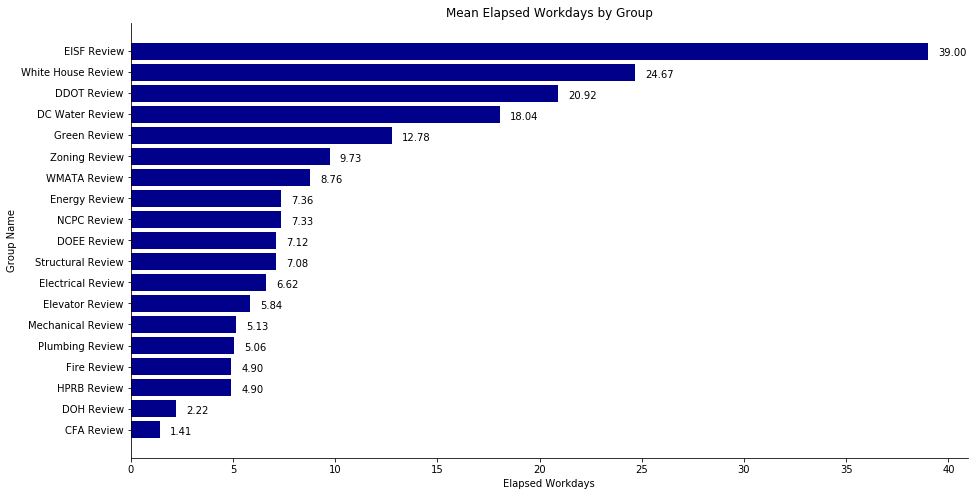

In [118]:
# plot
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.barh(range(len(x)), x, color = 'darkblue')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.yticks(range(len(x)),['CFA Review','DOH Review','HPRB Review','Fire Review','Plumbing Review','Mechanical Review','Elevator Review','Electrical Review','Structural Review','DOEE Review','NCPC Review','Energy Review','WMATA Review','Zoning Review','Green Review','DC Water Review','DDOT Review','White House Review','EISF Review'])
plt.ylabel('Group Name')
plt.xlabel('Elapsed Workdays')
for a, b in enumerate(x):
    plt.text(b + 0.5, a - 0.1, '%.2f' % b, ha='left', va='center')
plt.title('Mean Elapsed Workdays by Group')
plt.savefig('Mean Elapsed Workdays by Group.png')
plt.show()

In [121]:
y = dcra.groupby('Ward')['elapsed_workdays'].mean()
y

Ward
1.0    7.461634
2.0    7.245893
3.0    7.310513
4.0    8.286558
5.0    8.542781
6.0    8.073846
7.0    8.077844
8.0    5.000000
Name: elapsed_workdays, dtype: float64

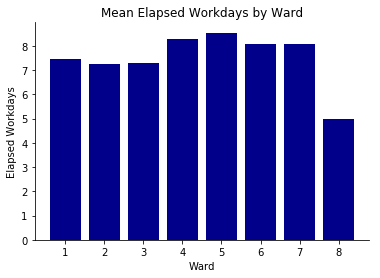

In [130]:
# plot
ax = plt.subplot()
ax.bar(range(len(y)), y, color = 'darkblue')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.xticks(range(len(y)),[1,2,3,4,5,6,7,8])
plt.xlabel('Ward')
plt.ylabel('Elapsed Workdays')

plt.title('Mean Elapsed Workdays by Ward')
plt.savefig('Mean Elapsed Workdays by Ward.png')
plt.show()